In [4]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-korneeva-25/shared/lesson_3_data.csv", encoding='windows-1251')

In [6]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [7]:
user_df = df[['tc', 'art_sp']]

In [8]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [9]:
# def split_brand(brand_name_data):
#     return brand_name_data.split()[-1]

user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split()[-1]) 

# lambda делает то же, что и предыдущая строка, но не определяет функцию явнo 

In [10]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [11]:
users_purchases = user_df.groupby('user_id', as_index=False) \
        .agg({'brand_name': 'count'}) \
        .rename(columns={'brand_name': 'purchases_count'}) \
        .query('purchases_count >= 5')
#Смотрим, сколько покупок совершил каждый пользователь и отбираем тех, у кого больше 5

In [12]:
users_purchases.head()

,user_id,purchases_count
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [13]:
user_unique_brands = user_df.groupby('user_id', as_index=False) \
        .agg({'brand_name': pd.Series.nunique}) \
        .rename(columns={'brand_name':'count_unique_brands'})

In [14]:
user_unique_brands.head()

,user_id,count_unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [15]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
        .agg({'brand_info': 'count'}) \
        .sort_values(['user_id', 'brand_info'], ascending=[True, False]) \
        .groupby('user_id') \
        .head(1) \
        .rename(columns={'brand_name': 'lovely_brand', 'brand_info': 'purchases_count_lovely_brand'})
     #   .query('brand_info >= 5')
    
    # Смотрим, сколько покупок любимого бренда сделал каждый пользователь 

In [16]:
lovely_brand_purchases_df.head()

,user_id,lovely_brand,purchases_count_lovely_brand
0,-1236394515,Brand_4,1
2,1031,Store_Brand,5
3,4241,Brand_4,3
5,17311,Brand_4,2
6,17312,Brand_1,1


In [17]:
loyality_df = users_purchases.merge(user_unique_brands, on='user_id') \
        .merge(lovely_brand_purchases_df, on='user_id')

#Соединяем датафреймы в один

In [18]:
loyality_df['loyality_score'] = loyality_df.purchases_count_lovely_brand / loyality_df.purchases_count

In [19]:
loyality_df.head()

,user_id,purchases_count,count_unique_brands,lovely_brand,purchases_count_lovely_brand,loyality_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


In [20]:
loyality_users = loyality_df[loyality_df.count_unique_brands == 1]

In [21]:
loyality_users[:7]

,user_id,purchases_count,count_unique_brands,lovely_brand,purchases_count_lovely_brand,loyality_score
13,86281,14,1,Brand_4,14,1.0
18,94961,6,1,Brand_4,6,1.0
29,132061,9,1,Brand_4,9,1.0
30,134281,6,1,Brand_4,6,1.0
35,157311,12,1,Brand_4,12,1.0
36,162221,22,1,Brand_4,22,1.0
41,172722,5,1,Store_Brand,5,1.0


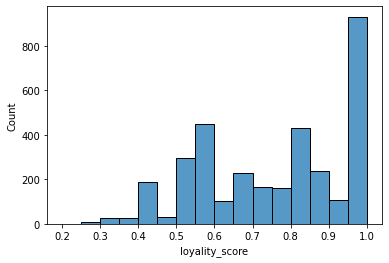

In [110]:
graf_loyality_users = sns.histplot(loyality_df.loyality_score)

In [104]:
loyality_users_others = loyality_df[loyality_df.count_unique_brands > 1]

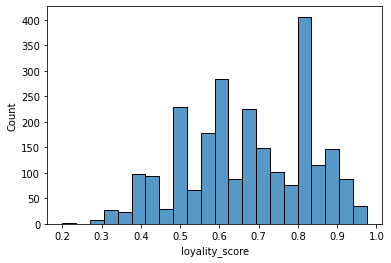

In [116]:
graf_loyality_users_others = sns.histplot(loyality_users_others.loyality_score)